# Object Detection using YOLO
YOLO(You Only Look Once) is an object detector that uses features learned by a deep convolutional neural network to detect an object. 

YOLO trained on the COCO dataset.The dataset consists of 80 labels, including, but not limited to:
People, <BR>
Bicycles, <BR>
Cars and trucks, <BR>
Airplanes, <BR>
Stop signs and fire hydrants, <BR>
Animals, including cats, dogs, birds, horses, cows, and sheep, and <BR>
Kitchen and dining objects, such as wine glasses, cups, forks, knives, spoons, etc. …and much more!

# Importing Resources

In [11]:
import cv2 #load our images
import matplotlib.pyplot as plt #plot them,

from utils import *  #module that contains some helper functions
from darknet import Darknet #modified version of *Darknet*. YOLO uses *Darknet*,an open source, deep neural network framework written by the creators of YOLO. 

# Setting Up The Neural Network

In [12]:
# Set the location and name of the cfg file that contains the network architecture
cfg_file = 'C://Users//Saiteja//Desktop//New folder//Object-detection-using-YOLOv3//cfg//yolov3.cfg'


In [13]:

# Set the location and name of the pre-trained weights file that contains the pre-trained weights
weight_file = 'C://Users//Saiteja//Desktop//New folder//Object-detection-using-YOLOv3//weights//yolov3.weights'


In [14]:

# Set the location and name of COCO object classes file that has the list of the 80 object classes that the weights were trained to detect.
namesfile = 'C://Users//Saiteja//Desktop//New folder//Object-detection-using-YOLOv3//data//coco.names'


In [15]:

# Load the network architecture
m = Darknet(cfg_file)
print(m)


Darknet(
  (models): ModuleList(
    (0): Sequential(
      (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky1): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (1): Sequential(
      (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky2): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (2): Sequential(
      (conv3): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky3): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (3): Sequential(
      (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.

In [16]:

# Load the pre-trained weights
m.load_weights(weight_file)
print(m.load_weights)



<bound method Darknet.load_weights of Darknet(e
  (models): ModuleList(
    (0): Sequential(
      (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky1): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (1): Sequential(
      (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky2): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (2): Sequential(
      (conv3): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky3): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (3): Sequential(
      (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn4)

In [17]:

# Load the COCO object classes
class_names = load_class_names(namesfile)
print(class_names)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Taking a Look at The Neural Network

In [18]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

As we can see, the neural network used by YOLOv3 consists mainly of convolutional layers, with some shortcut connections and upsample layers. For a full description of this network please refer to the <a href="https://pjreddie.com/media/files/papers/YOLOv3.pdf">YOLOv3 Paper</a>.

# Loading and Resizing Our Images

In [19]:
import matplotlib as plt
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

In [20]:

# load our images using OpenCV's cv2.imread() function.
img = cv2.imread('./images/surf.jpg')


In [21]:

# #Since, this function loads images as BGR we will convert our images to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [22]:

# We resize the image to the input width and height of the first layer of the network ie 416 x 416 x 3.    
resized_image = cv2.resize(original_image, (m.width, m.height))


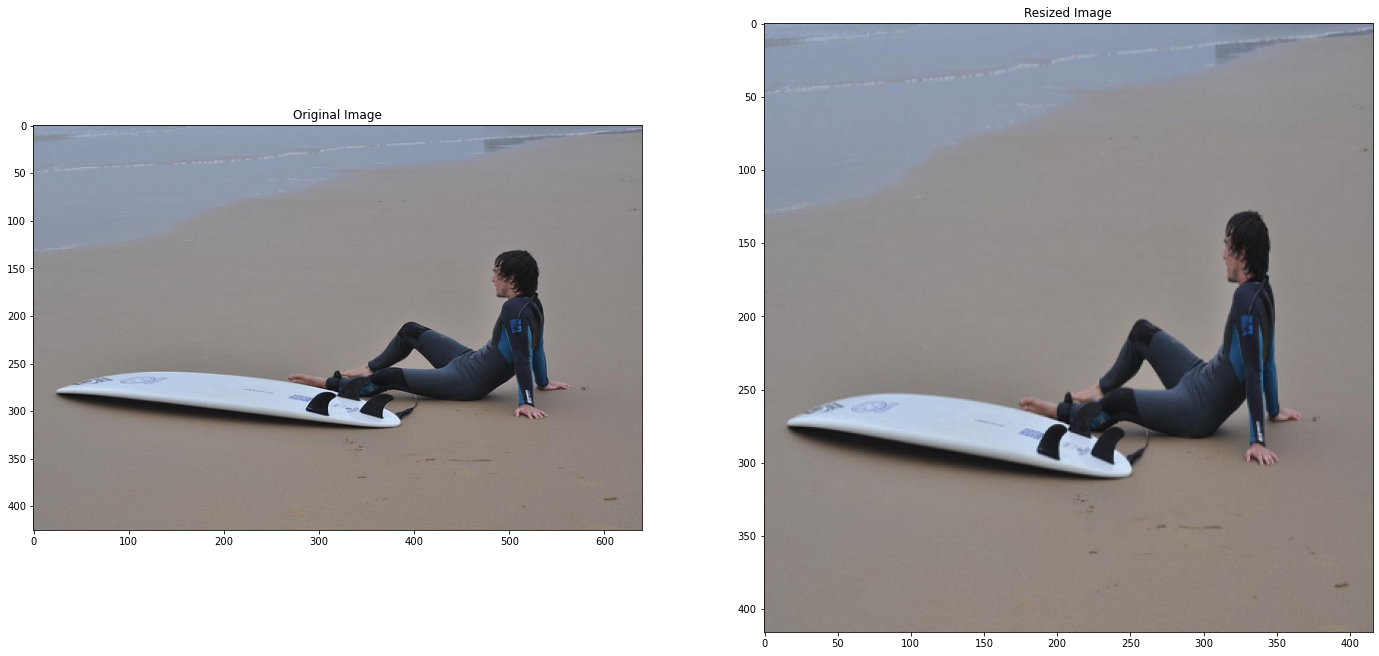

In [23]:

import matplotlib.pyplot as plt #plot them,
from matplotlib import pyplot as plt
#plt=__import__("matplotlib.pyplot")
# Display the images
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(1,2,2)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()


# Setting the Non-Maximal Suppression (NMS) Threshold
 YOLO uses **Non-Maximal Suppression (NMS)** to only keep the best bounding box. The first step in NMS is to remove all the predicted bounding boxes that have a detection probability that is less than a given NMS threshold.  

In [24]:
# Set the NMS threshold
nms_thresh = 0.8

# Setting the Intersection Over Union (IOU) Threshold

After removing all the predicted bounding boxes that have a low detection probability, the second step in NMS, is to select the bounding boxes with the highest detection probability and eliminate all the bounding boxes whose **Intersection Over Union (IOU)** value is higher than a given IOU threshold.

In [25]:
# Set the IOU threshold
iou_thresh = 0.6

# Object Detection



It took 2.458 seconds to detect the objects in the image.

Number of Objects Detected: 2 

Objects Found and Confidence Level:

1. person: 1.000000
2. surfboard: 0.994814


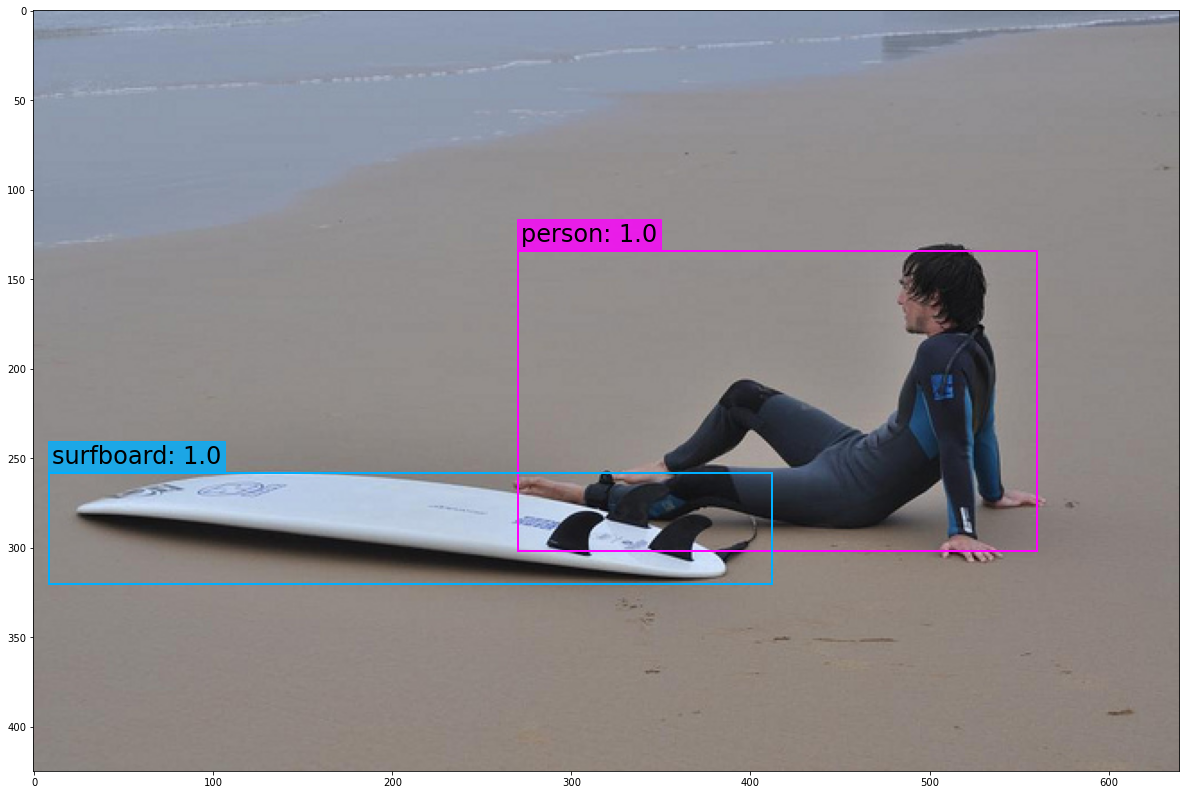

In [26]:
# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)